### Use NetworkX

In [1]:
import importlib
import agents
importlib.reload(agents)
from agents import *
import env
importlib.reload(env)
from env import *

env = CitizenBankEnv(10)

df = pd.read_csv('links.csv')[['DeviceA_Code','DeviceB_Code']]
points_list = [(i,j) for i,j in df.values]

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

TypeError: CitizenBankEnv.__init__() takes 1 positional argument but 2 were given

### Use Q learning

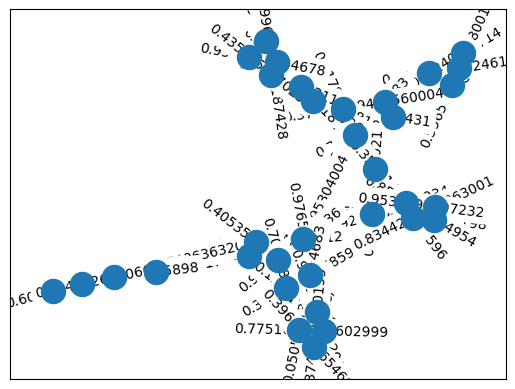

,DeviceA,InterfaceA,InterfaceAIP,DeviceBName,InterfaceBName,InterfaceBIP,Bandwidth (Mbps),DeviceA_Code,DeviceB_Code,cost
0,dc1_r1,ethernet1,192.168.99.1/30,dc1_r3,ethernet1,192.168.99.2/30,1000,0,2,0.219020
1,dc1_r2,ethernet1,192.168.99.13/30,dc1_r3,ethernet1,192.168.99.14/30,1000,1,2,0.596573
2,dc1_r1,ethernet2,192.168.99.9/30,dc1_r4,ethernet2,192.168.99.10/30,1000,0,3,0.455996
3,dc1_r2,ethernet2,192.168.99.5/30,dc1_r4,ethernet2,192.168.99.6/30,1000,1,3,0.816131
4,dc1_r3,ethernet3,192.168.1.35/24,dc1_r5,ethernet1,192.168.1.53/24,1000,2,4,0.263253


src:  29  dest:  15
qlearning path:  [29, 11, 8, 6, 19, 17, 15] cost:  1.6795699417783525
dijkstra path:   [29, 11, 8, 6, 19, 17, 15] cost:  1.6795699417783525


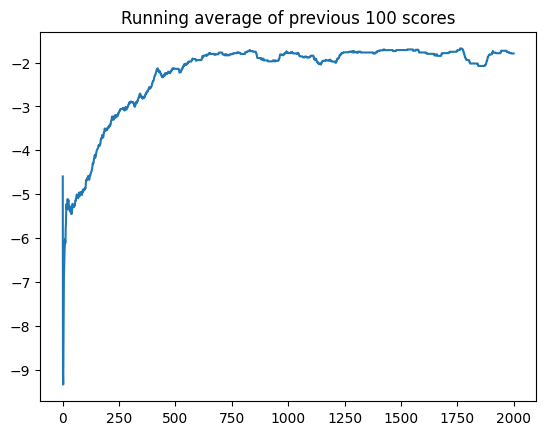

In [4]:
import importlib
import agents
importlib.reload(agents)
from agents import *
import env
importlib.reload(env)
from env import *

iters = 2000

env = CitizenBankEnv()
display(env.df.head())
src = env.state
dest = env.dest

q_agent = QAgent(env, env.num_devices, env.num_devices)
trainer = TainAgent(q_agent, env, iters)
reward_list = trainer.train_src_dest(env.state,env.dest)

if reward_list:
    x = [i+1 for i in range(iters)]
    trainer.plot_learning_curve(x, reward_list)
    path, cost = trainer.find_path(src, dest)
    print('qlearning path: ', path, 'cost: ', cost)
#print('dijkstra path:  ', nx.shortest_path(G, src, dest, weight='Bandwidth (Mbps)'))
print('dijkstra path:  ', [int(i) for i in nx.shortest_path(env.G, src, dest, weight='weight')], 'cost: ', nx.shortest_path_length(env.G, src, dest, weight='weight'))

In [6]:
import sys 
print (sys.version)

3.8.13 (default, Mar 28 2022, 06:13:39) 
[Clang 12.0.0 ]


In [98]:
env.df.head()

,DeviceA,InterfaceA,InterfaceAIP,DeviceBName,InterfaceBName,InterfaceBIP,Bandwidth (Mbps),DeviceA_Code,DeviceB_Code
0,dc1_r1,ethernet1,192.168.99.1/30,dc1_r3,ethernet1,192.168.99.2/30,0.000873,0,2
1,dc1_r2,ethernet1,192.168.99.13/30,dc1_r3,ethernet1,192.168.99.14/30,0.000498,1,2
2,dc1_r1,ethernet2,192.168.99.9/30,dc1_r4,ethernet2,192.168.99.10/30,0.000562,0,3
3,dc1_r2,ethernet2,192.168.99.5/30,dc1_r4,ethernet2,192.168.99.6/30,0.000855,1,3
4,dc1_r3,ethernet3,192.168.1.35/24,dc1_r5,ethernet1,192.168.1.53/24,0.000838,2,4


In [59]:
env.costs

array([[0.00000000e+00, 0.00000000e+00, 7.47248124e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.47305063e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.47248124e-06, 2.47305063e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])